# Origin's Land Use Polygons analysis

This code allows you to estimate the proportion of each category of land use within the 600m buffer associated to the orgin. All the polygons related to each origin are assumed to be previously estimated. These are found in the Shapes folder: Shapes/start_LU600 

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import math

print ("it works")

it works


### Example for only one route 

In [2]:
route = 1128
db = gpd.read_file('../Shapes/start_LU600/R' +"%s" % (route) +'_start_LU600.shp')
print (db.crs)
db.head()

{'init': 'epsg:3116'}


,shapelen,objectid,subcategor,cod_subcat,shapearea,cod_cat_us,areagralus,objectid_1,Epub,Eqpto,Hmix,Mmix,Lmix,A_Epub,A_Eqpto,A_Hmix,A_Mmix,A_Lmix,geometry
0,160.191394,18082.0,None,41.0,1217.013672,4.0,Espacio P?blico Existente,18082.0,1.0,0.0,0.0,0.0,0.0,1217.013672,0.0,0.000000,0.0,0.00000,"POLYGON ((833011.8477946175 1181458.299455776,..."
1,329.627355,1970.0,?reas predominantemente residenciales,11.0,5065.811090,1.0,?reas de baja mixtura,1970.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,5065.81109,"POLYGON ((833035.946264077 1181264.980047031, ..."
2,136.672116,17953.0,None,41.0,6.748471,4.0,Espacio P?blico Existente,17953.0,1.0,0.0,0.0,0.0,0.0,6.748471,0.0,0.000000,0.0,0.00000,"POLYGON ((833533.2449424032 1181100.136158092,..."
3,244.329997,15596.0,Centralidades y corredores con alta mixtura,32.0,2481.107533,3.0,?reas y corredores de alta mixtura,15596.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,2481.107533,0.0,0.00000,"POLYGON ((833395.0999646953 1181342.816020431,..."
4,397.216914,15597.0,Centralidades y corredores con alta mixtura,32.0,10021.906466,3.0,?reas y corredores de alta mixtura,15597.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,10021.906466,0.0,0.00000,"POLYGON ((833056.151628878 1181237.097367974, ..."


In [3]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 19 columns):
shapelen      112 non-null float64
objectid      112 non-null float64
subcategor    83 non-null object
cod_subcat    112 non-null float64
shapearea     112 non-null float64
cod_cat_us    112 non-null float64
areagralus    112 non-null object
objectid_1    112 non-null float64
Epub          112 non-null float64
Eqpto         112 non-null float64
Hmix          112 non-null float64
Mmix          112 non-null float64
Lmix          112 non-null float64
A_Epub        112 non-null float64
A_Eqpto       112 non-null float64
A_Hmix        112 non-null float64
A_Mmix        112 non-null float64
A_Lmix        112 non-null float64
geometry      112 non-null object
dtypes: float64(16), object(3)
memory usage: 16.7+ KB


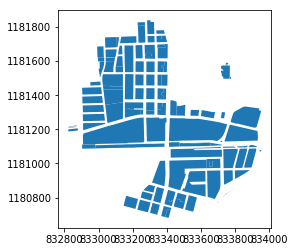

In [4]:
db.plot()

In [5]:
LU_Ep = (db['A_Epub']).sum()
LU_Eqpto = (db['A_Eqpto']).sum()
LU_Hmix = (db['A_Hmix']).sum()
LU_Mmix = (db['A_Mmix']).sum()
LU_Lmix = (db['A_Lmix']).sum()
ALU = LU_Ep + LU_Eqpto + LU_Hmix + LU_Mmix + LU_Lmix

In [6]:
print (LU_Ep)
print (LU_Eqpto)
print (LU_Hmix)
print (LU_Mmix)
print (LU_Lmix)
print (ALU)

30701.816382945002
19315.164725230003
281749.087667655
0.0
116269.978084945
448036.04686077504


In [7]:
pLU_Ep = LU_Ep / ALU
pLU_Eqpto = LU_Eqpto / ALU
pLU_Hmix = LU_Hmix / ALU
pLU_Mmix = LU_Mmix / ALU
pLU_Lmix = LU_Lmix / ALU

In [8]:
print (pLU_Ep) 
print (pLU_Eqpto)
print (pLU_Hmix) 
print (pLU_Mmix)
print (pLU_Lmix)

0.06852532647330815
0.043110738210829926
0.6288536148860521
0.0
0.25951032042980976


In [9]:
results = pd.DataFrame ({
        "route": [str(route)],
        "pLU_Ep" : [str(pLU_Ep)],
        "pLU_Eqpto" : [str(pLU_Eqpto)],
        "pLU_Hmix" : [str(pLU_Hmix)],
        "pLU_Mmix" : [str(pLU_Mmix)],
        "pLU_Lmix" : [str(pLU_Lmix)]})
print (results)

   ruta               pLU_Ep             pLU_Eqpto            pLU_Hmix  \
0  1128  0.06852532647330815  0.043110738210829926  0.6288536148860521   

  pLU_Mmix             pLU_Lmix  
0      0.0  0.25951032042980976  


## Origin's Land Use Polygons analysis for All routes 

The code requires the list of the origin points associated to all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [10]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

In [17]:
for i in routes:
    
    db = gpd.read_file('../Shapes/start_LU600/R' +"%s" % (i) +'_start_LU600.shp')
    LU_Ep = (db['A_Epub']).sum()
    LU_Eqpto = (db['A_Eqpto']).sum()
    LU_Hmix = (db['A_Hmix']).sum()
    LU_Mmix = (db['A_Mmix']).sum()
    LU_Lmix = (db['A_Lmix']).sum()
    ALU = LU_Ep + LU_Eqpto + LU_Hmix + LU_Mmix + LU_Lmix
    pLU_Ep = LU_Ep / ALU
    pLU_Eqpto = LU_Eqpto / ALU
    pLU_Hmix = LU_Hmix / ALU
    pLU_Mmix = LU_Mmix / ALU
    pLU_Lmix = LU_Lmix / ALU
    results = pd.DataFrame ({
        "route": [str(i)],
        "pLU_Ep" : [str(pLU_Ep)],
        "pLU_Eqpto" : [str(pLU_Eqpto)],
        "pLU_Hmix" : [str(pLU_Hmix)],
        "pLU_Mmix" : [str(pLU_Mmix)],
        "pLU_Lmix" : [str(pLU_Lmix)]})
    results.to_csv('../Tables/OUT/R' +"%s" %(i)+'_start_LU600.txt',index=False, header=True)

This part of the code summarizes the Origin's arcs infrastructure in only one table. Please copy it to a text file and save. 

In [19]:
print ('route,O_pLU_Ep,O_pLU_Eqpto,O_pLU_Hmix,O_pLU_Mmix,O_pLU_Lmix')
for i in routes:
    df=np.loadtxt('../datos/tables/OUT/start_LU600_index/R' +"%s" %(i)+'_start_LU600.txt', delimiter=',',skiprows=1)
    print ((str(i)),(df[1]),(df[2]),(df[3]),(df[4]),(df[5]))

ruta,O_pLU_Ep,O_pLU_Eqpto,O_pLU_Hmix,O_pLU_Mmix,O_pLU_Lmix,O_entropy
('1002', 0.081278952204600005, 0.060209995762999999, 0.077061575747300007, 0.075325874174899998, 0.70612360211000003, 0.62829314104699996)
('1006', 0.099015055082200001, 0.088353982529499997, 0.35086945461500002, 0.0459081407363, 0.41585336703699999, 0.81839776861199998)
('1009', 0.23636747322900001, 0.141373373128, 0.13542149081900001, 0.0043776059609800001, 0.48246005686299998, 0.78516964604799999)
('1013', 0.062658217835000002, 0.060572170757799998, 0.047012605438699999, 0.0127730272388, 0.81698397872999995, 0.43989116225300001)
('10291', 0.54599605711800003, 0.103687169229, 0.089762670470500003, 0.0087432831815000001, 0.251810820002, 0.72726378615700005)
('10292', 0.10794540192300001, 0.184641459215, 0.126067648329, 0.020143123189800001, 0.56120236734399997, 0.75563601463100005)
('1050', 0.22076914869100001, 0.132304617407, 0.108336438028, 0.115176394906, 0.42341340096800001, 0.903856491466)
('1052', 0.14256435224